In [69]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.optimize import minimize
from scipy import fft


In [70]:
root_dir = os.path.dirname(os.getcwd())
df = pd.read_csv(os.path.join(root_dir, "data/processed/data_cleaned.csv"))

/tmp/ipykernel_66755/2404526448.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root_dir, "data/processed/data_cleaned.csv"))


In [71]:
df.head(10)

,subject,gender,age,hand,x_coordinate,y_coordinate,timestamp,state,date,azimuth,altitude,pressure,control,session
0,T001,NaN,NaN,R,1493,9752,2098403,1,1970-01-01 12:34:58.403000,1990,720,6,N,u00005s00001_hw00001.svc
1,T001,NaN,NaN,R,1490,9752,2098411,1,1970-01-01 12:34:58.411000,1990,720,168,N,u00005s00001_hw00001.svc
2,T001,NaN,NaN,R,1490,9752,2098418,1,1970-01-01 12:34:58.418000,1990,720,328,N,u00005s00001_hw00001.svc
3,T001,NaN,NaN,R,1490,9752,2098426,1,1970-01-01 12:34:58.426000,1990,720,480,N,u00005s00001_hw00001.svc
4,T001,NaN,NaN,R,1489,9752,2098433,1,1970-01-01 12:34:58.433000,1990,720,667,N,u00005s00001_hw00001.svc
5,T001,NaN,NaN,R,1489,9752,2098441,1,1970-01-01 12:34:58.441000,1990,720,791,N,u00005s00001_hw00001.svc
6,T001,NaN,NaN,R,1489,9752,2098448,1,1970-01-01 12:34:58.448000,2020,720,889,N,u00005s00001_hw00001.svc
7,T001,NaN,NaN,R,1489,9752,2098456,1,1970-01-01 12:34:58.456000,2020,720,967,N,u00005s00001_hw00001.svc
8,T001,NaN,NaN,R,1489,9752,2098463,1,1970-01-01 12:34:58.463000,2020,720,1031,N,u00005s00001_hw00001.svc
9,T001,NaN,NaN,R,1488,9752,2098471,1,1970-01-01 12:34:58.471000,2020,720,1065,N,u00005s00001_hw00001.svc


In [72]:
df.describe()

,age,x_coordinate,y_coordinate,timestamp,state,azimuth,altitude,pressure
count,51060.000000,250802.000000,250802.000000,2.508020e+05,250802.000000,250802.000000,250802.000000,250802.000000
mean,42.698394,3836.949331,6376.095613,1.222163e+11,0.806258,1218.043197,673.766995,958.260943
std,13.403745,1890.954648,2679.231170,3.871606e+11,0.395230,1000.303596,134.801812,620.309786
min,22.000000,59.000000,1399.000000,1.264550e+05,0.000000,0.000000,220.000000,0.000000
25%,32.000000,1770.000000,3820.000000,1.777883e+06,1.000000,340.000000,570.000000,488.000000
50%,48.000000,4592.000000,6797.000000,2.633750e+06,1.000000,940.000000,690.000000,1067.000000
75%,52.000000,5411.000000,8593.000000,5.482293e+06,1.000000,1900.000000,770.000000,1369.000000
max,62.000000,7198.000000,12317.000000,1.363796e+12,1.000000,3590.000000,900.000000,2048.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250802 entries, 0 to 250801
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   subject       250802 non-null  object 
 1   gender        51060 non-null   object 
 2   age           51060 non-null   float64
 3   hand          250802 non-null  object 
 4   x_coordinate  250802 non-null  int64  
 5   y_coordinate  250802 non-null  int64  
 6   timestamp     250802 non-null  int64  
 7   state         250802 non-null  int64  
 8   date          250802 non-null  object 
 9   azimuth       250802 non-null  int64  
 10  altitude      250802 non-null  int64  
 11  pressure      250802 non-null  int64  
 12  control       250802 non-null  object 
 13  session       250802 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 26.8+ MB


In [74]:
print(f"There are {len(df['subject'].unique())} subjects in this dataset")

There are 32 subjects in this dataset


In [75]:
print(f"There are {len(df[(df.control == 'Y')]['subject'].unique())} healthy subjects and {len(df[(df.control == 'N')]['subject'].unique())} sick subjects in this dataset")

There are 10 healthy subjects and 22 sick subjects in this dataset


In [76]:
# All sessions
len(list(df['session'].unique()))

108

In [77]:
print(f"There are {len(df[(df.control == 'Y')]['session'].unique())} healthy session and {len(df[(df.control == 'N')]['session'].unique())} sick session in this dataset")

There are 20 healthy session and 90 sick session in this dataset


In [78]:
df["x_coordinate"].isna().sum(), df["y_coordinate"].isna().sum()

(0, 0)

In [79]:
len(df[(df["altitude"] == 0) & (df["azimuth"] == 0) & (df["pressure"] == 0)])

0

In [80]:
len(df[(df["state"] == 0) & (df["pressure"] != 0)])

0

In [81]:
missing_no = df.isnull().sum()
missing_no = missing_no[missing_no > 0]
print(f"There are {len(missing_no)} variables which contain an X number of missing (NaN or Null) values: \n{missing_no.to_string()}")

There are 2 variables which contain an X number of missing (NaN or Null) values: 
gender    199742
age       199742


In [82]:
for var, num in missing_no.items():
    total_no = len(df[f"{var}"])
    percent = (num / total_no) * 100
    print(f"{var}\t{round(percent,2)}%".expandtabs(15))

gender         79.64%
age            79.64%


In [83]:
filtered_data = df[(df['x_coordinate'] == 0) & (df['y_coordinate'] == 0)]
grouped_data = filtered_data.groupby(['subject', 'session']).size()
print(f"There are {len(grouped_data)} sessions that have spirals positioned at (0,0)")

There are 0 sessions that have spirals positioned at (0,0)


In [84]:
df['x_coordinate'] = pd.to_numeric(df['x_coordinate'], errors='coerce')
df['y_coordinate'] = pd.to_numeric(df['y_coordinate'], errors='coerce')
df["date"] = pd.to_datetime(df["date"])
df["timestamp"] = df["date"].dt.time.astype(str)


control_df= df[(df.subject == "C01") & (df.session == "u00003s00002_hw000011.svc")].reset_index(drop=True)
non_control_df = df[(df.subject == "T001") & (df.session == "u00005s00001_hw00001.svc")].reset_index(drop=True)


In [85]:
def plot_drawing(df):
    plt.figure(figsize=(8, 6))
    plt.scatter(df['x_coordinate'], df['y_coordinate'], s=2)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Handwritten Spirals')
    plt.show()

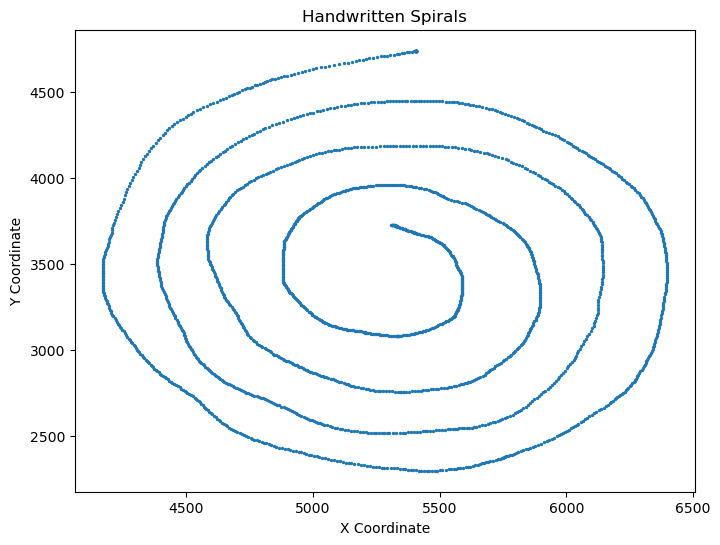

In [86]:
plot_drawing(control_df)

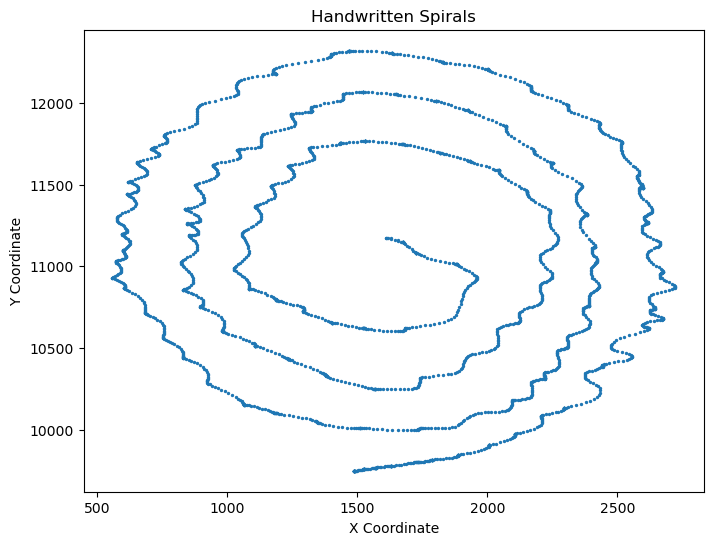

In [87]:
plot_drawing(non_control_df)

# Delta features

In [88]:
# Calculating the difference of altitude between the coordinates for the specified sessions
def plot_delta_altitude(df):
    delta_altitude = []
    for i in range(1, len(df)-1):
        delta_altitude.append(abs(df['altitude'].iloc[i] - df['altitude'].iloc[i+1]))
    plt.figure(figsize=(10, 6))
    time_step = np.arange(len(delta_altitude))
    plt.plot(, delta_altitude)
    plt.xlabel('Time Step')
    plt.ylabel(f'Delta altitude')
    plt.title(f'Delta altitude over time by session')

# Calculating the difference of azimuth between the coordinates for the specified sessions
def plot_delta_azimuth(df):
    delta_azimuth = []
    for i in range(1, len(df)-1):
        delta_azimuth.append(abs(df['azimuth'].iloc[i] - df['azimuth'].iloc[i+1]))
    plt.figure(figsize=(10, 6))
    time_step = np.arange(len(delta_azimuth))
    plt.plot(time_step, delta_azimuth)
    plt.xlabel('Time Step')
    plt.ylabel(f'Delta azimuth')
    plt.title(f'Delta azimuth over time by session')

# Calculating the difference of pressure between the coordinates for the specified sessions
def plot_delta_pressure(df):
    delta_pressure = []
    for i in range(1, len(df)-1):
        delta_pressure.append(abs(df['pressure'].iloc[i] - df['pressure'].iloc[i+1]))
    plt.figure(figsize=(10, 6))
    time_step = np.arange(len(delta_pressure))
    plt.plot(time_step, delta_pressure)
    plt.xlabel('Time Step')
    plt.ylabel(f'Delta pressure')
    plt.title(f'Delta pressure over time by session')


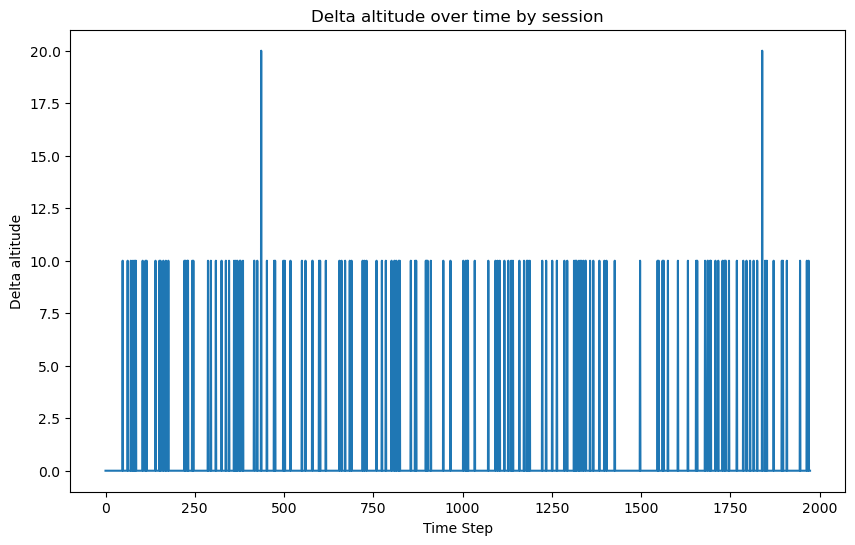

In [89]:
plot_delta_altitude(control_df)

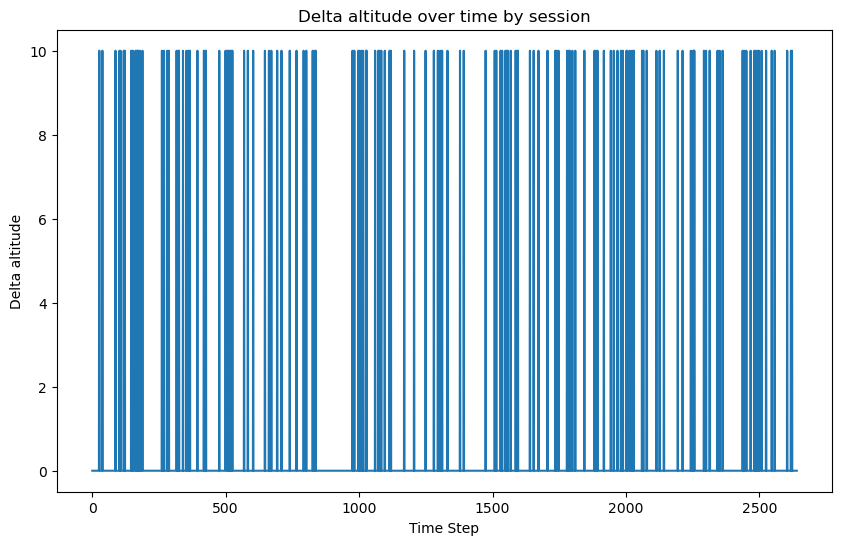

In [90]:
plot_delta_altitude(non_control_df)

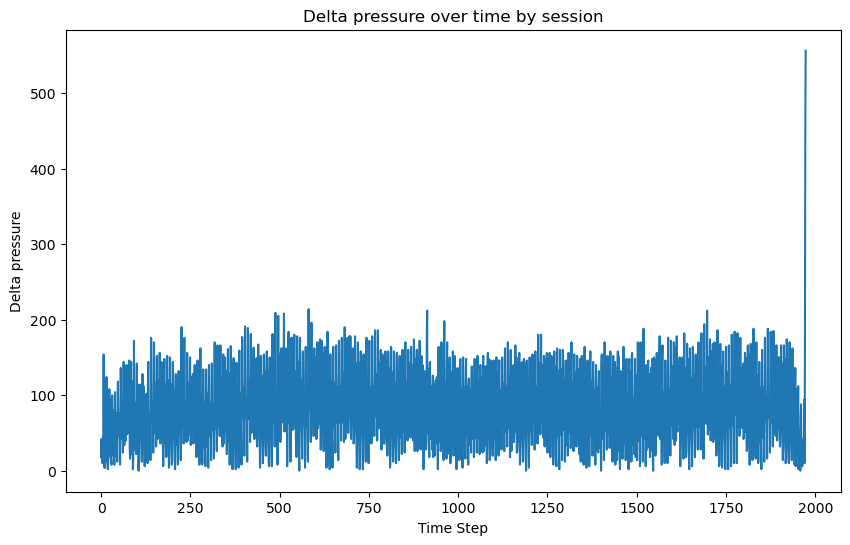

In [91]:
plot_delta_pressure(control_df)

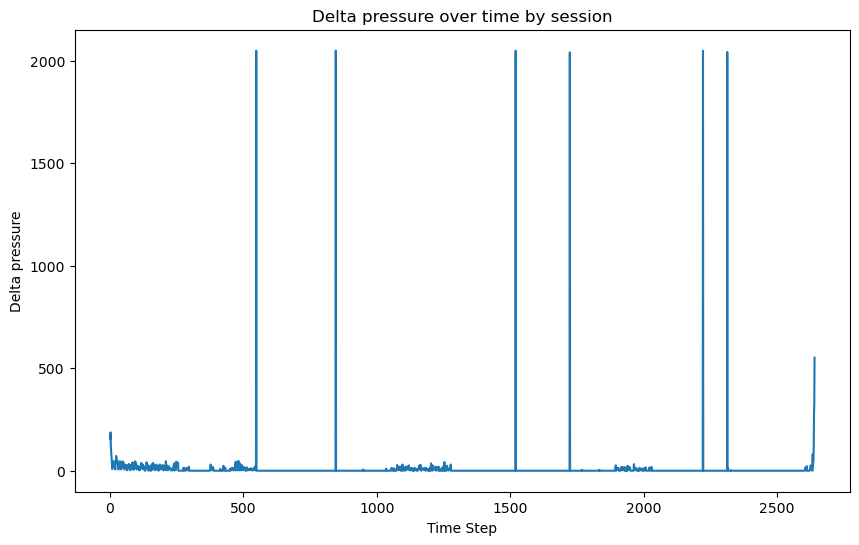

In [92]:
plot_delta_pressure(non_control_df)

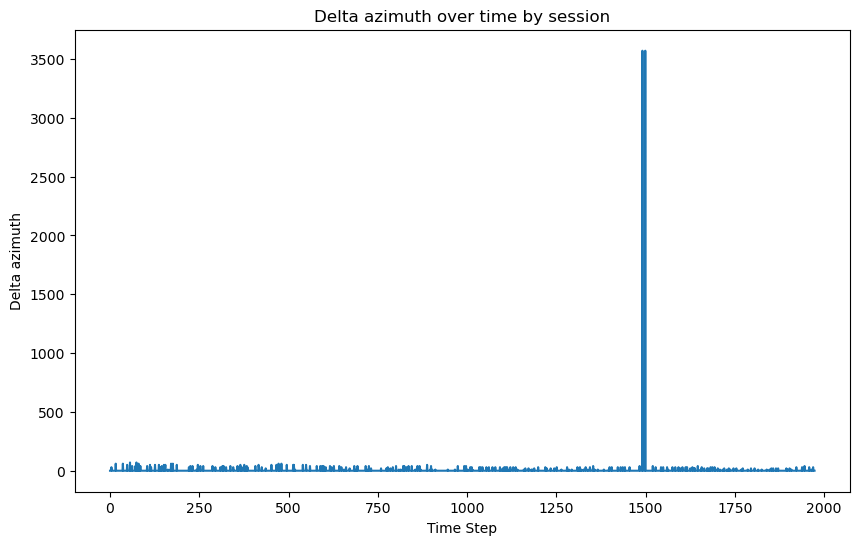

In [93]:
plot_delta_azimuth(control_df)

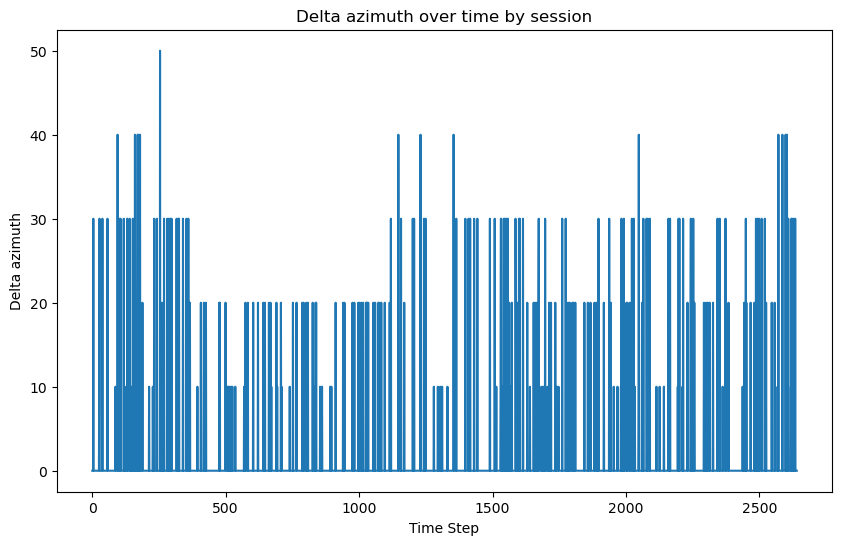

In [94]:
plot_delta_azimuth(non_control_df)

# Frequency

In [ ]:
# TODO: Caclulate drawing speed and frequency
def calculate_metrics(df):
    df = df.copy()
    df["dist"] = 

    df["dx"] = df["x_coordinate"].diff()
    df["dy"] = df["y_coordinate"].diff()
    df["distance"] = np.sqrt(df["dx"] ** 2 + df["dy"] ** 2)
    df["dt"] = pd.to_datetime(df["date"]).diff().dt.total_seconds()
    df["speed"] = df["distance"] / df["dt"]

    speed_data = df["speed"].dropna().values
    N = len(speed_data)
    T = df["dt"].mean()
    yf = fft(speed_data)
    xf = fftfreq(N, T)[: N // 2]

    positive_freq = xf[1 : N // 2]
    magnitudes = 2.0 / N * np.abs(yf[1 : N // 2])
    mask = (positive_freq >= 1) & (positive_freq <= 10)
    dominant_freq = positive_freq[mask][np.argmax(magnitudes[mask])]

    speed_cv = variation(df["speed"].dropna())

    return {
        "dominant_frequency": dominant_freq,
        "speed_variability": speed_cv,
    }

In [95]:
def plot_frequency():

    
    return

# Drawing Speed

In [96]:
def plot_drawing_speed():
    return